### Conditional Graphs

In [6]:
from typing import TypedDict, List, Literal
from langgraph.graph import StateGraph, START, END

In [7]:
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    finalNumber: int

In [8]:
def adder(state: AgentState) -> AgentState:
    """This node adds two numbers"""
    state['finalNumber'] = state['num1'] + state['num2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts two numbers"""
    state['finalNumber'] = state['num1'] - state['num2']
    return state

# this node will be used to decide the next node
def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"


In [9]:
graph = StateGraph(AgentState)

graph.add_node("router", lambda state: state) # pass through function (we are not changing the state in the decide_next_node function)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    # Source Node - The Node from which the conditional edges are directed
    "router",
    # Function to decide the next edge
    decide_next_node,
    {
        # Edge : Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

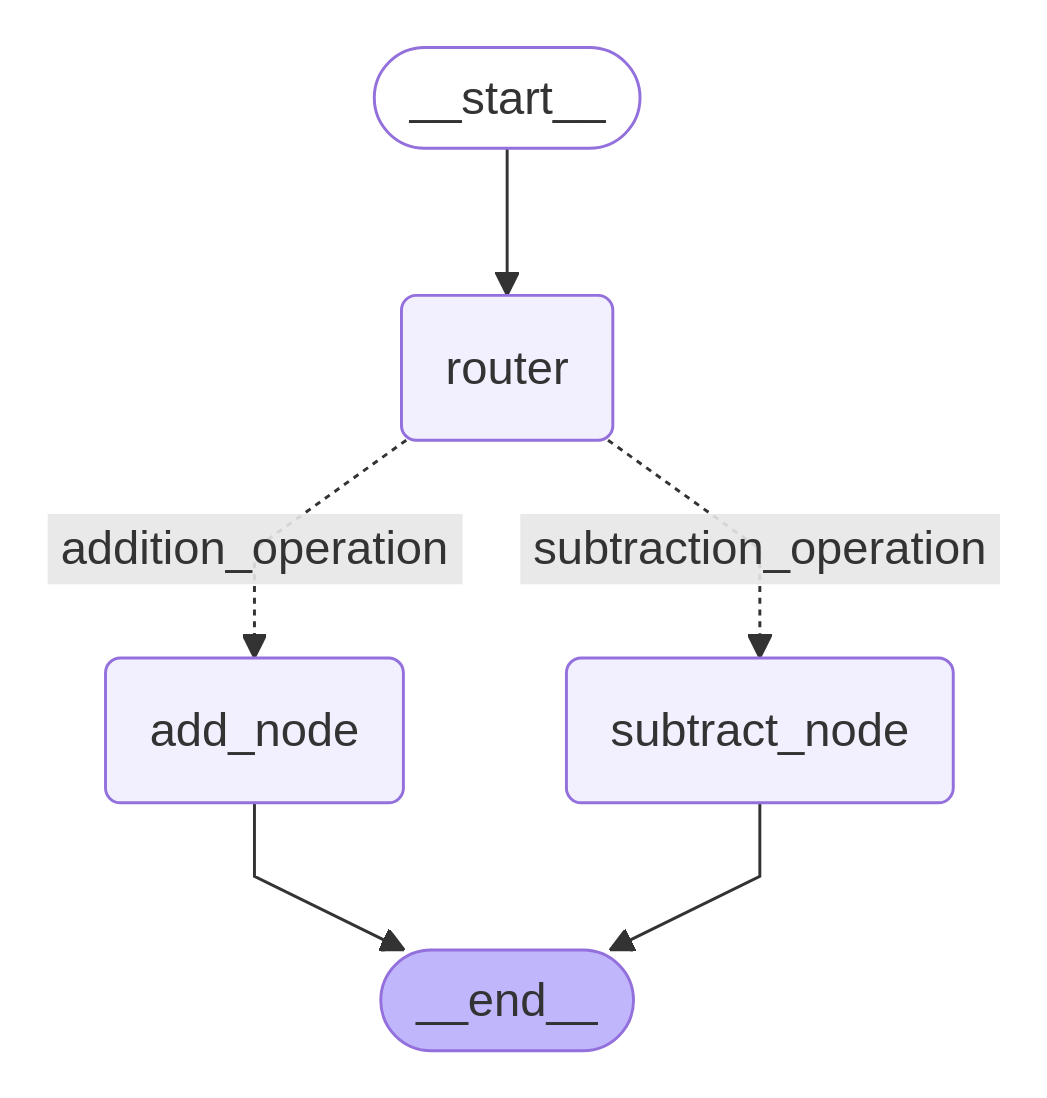

In [10]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [11]:
inital_state_1 = AgentState(num1 = 10, operation='-', num2 = 4)
print(app.invoke(inital_state_1))

{'num1': 10, 'operation': '-', 'num2': 4, 'finalNumber': 6}


In [12]:
inital_state_2 = AgentState(num1 = 10, operation='+', num2 = 4)
print(app.invoke(inital_state_2))

{'num1': 10, 'operation': '+', 'num2': 4, 'finalNumber': 14}


#### Graph - Exercise 4

In [13]:
class ASE4(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    op1: str
    op2: str
    final1: int
    final2: int

In [14]:
def adder(state: ASE4) -> ASE4:
    """This node adds two numbers"""
    state['final1'] = state['num1'] + state['num2']
    return state

def subtractor(state: ASE4) -> ASE4:
    """This node subtracts two numbers"""
    state['final1'] = state['num1'] - state['num2']
    return state

def adder2(state: ASE4) -> ASE4:
    """This node adds two numbers"""
    state['final2'] = state['num3'] + state['num4']
    return state

def subtractor2(state: ASE4) -> ASE4:
    """This node subtracts two numbers"""
    state['final2'] = state['num3'] - state['num4']
    return state

# this node will be used to decide the next node
def decide_next_node1(state: ASE4) -> ASE4:
    """This node will select the next node of the graph"""
    if state['op1'] == "+":
        return "addition_operation"
    elif state['op1'] == '-':
        return "subtraction_operation"

def decide_next_node2(state: ASE4) -> ASE4:
    """This node will select the next node of the graph"""
    
    if state['op2'] == "+":
        return "addition_operation2"
    elif state['op2'] == '-':
        return "subtraction_operation2"

In [15]:
graph = StateGraph(ASE4)

graph.add_node("router", lambda state: state)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router2",lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node1,
    {
        "addition_operation" : "add_node",
        "subtraction_operation" : "subtract_node",
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2" : "add_node2",
        "subtraction_operation2" : "subtract_node2",
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)
app = graph.compile()

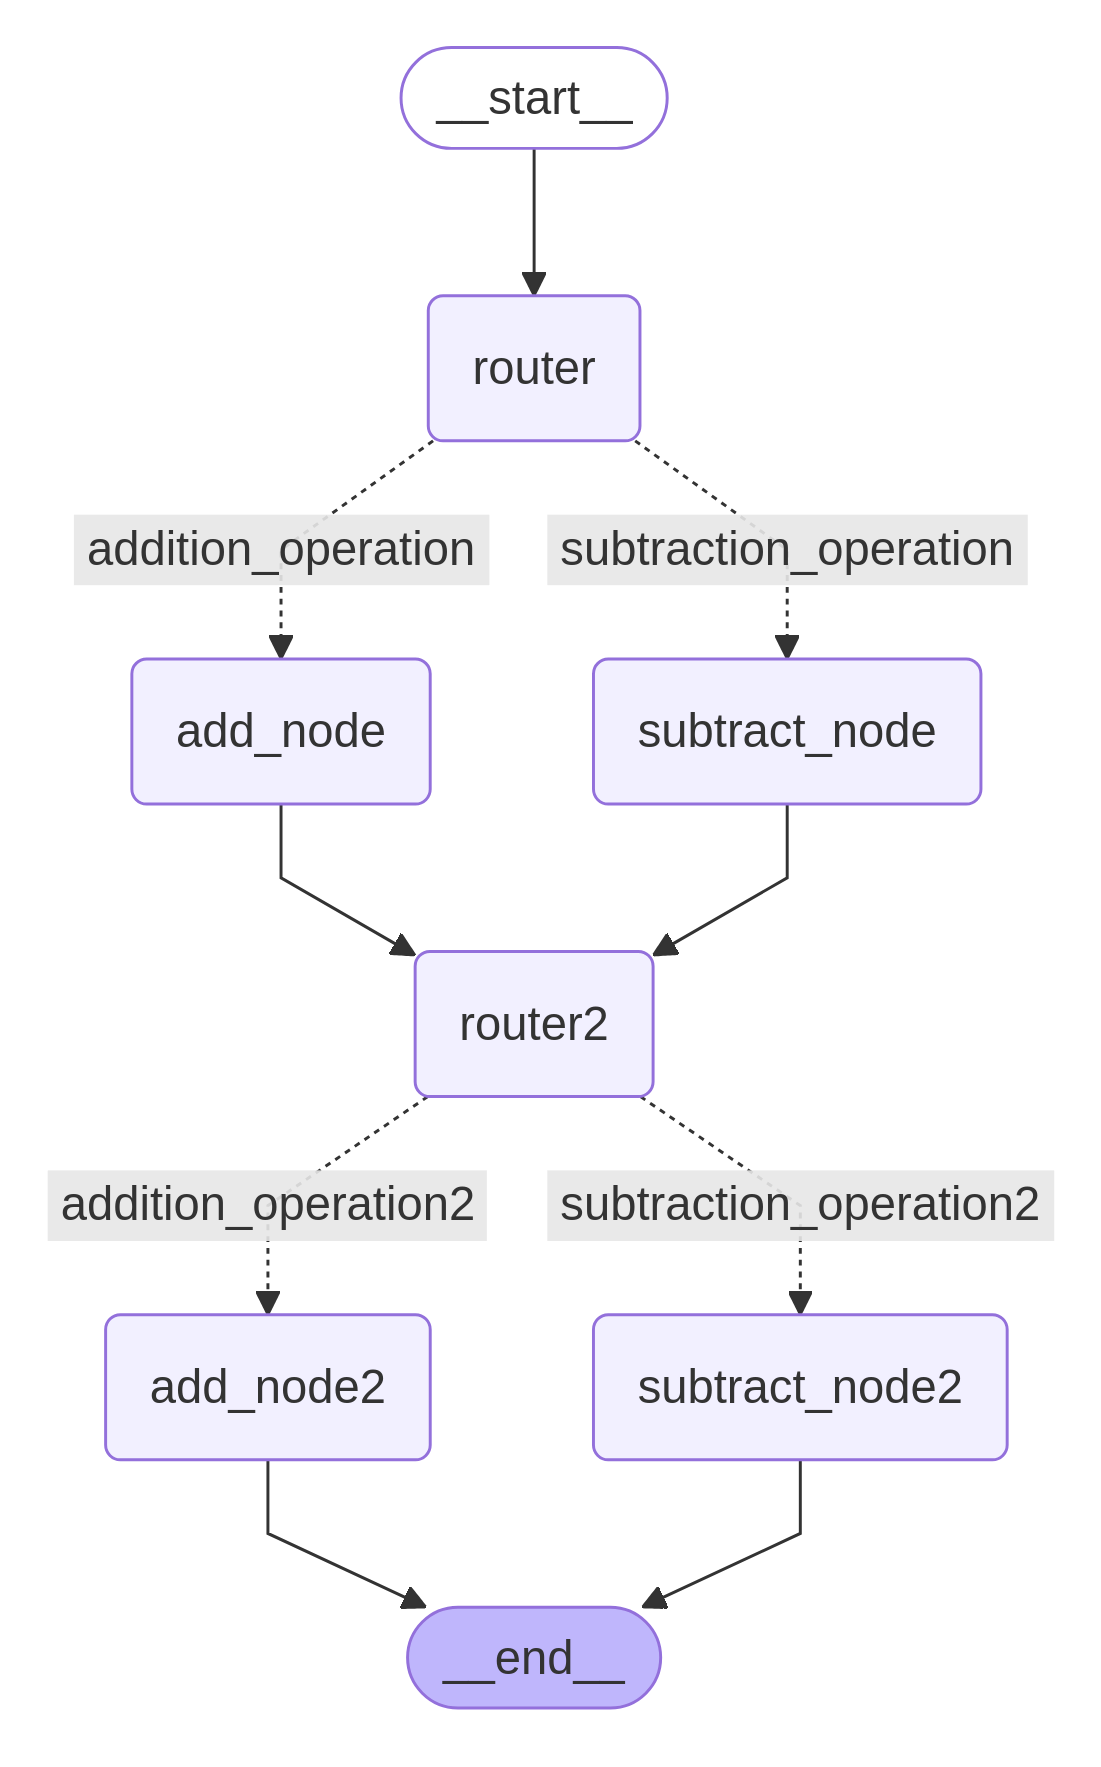

In [16]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [17]:
initial_state_1 = ASE4(num1=10, num2=3, num3=7, num4=6, op1='+', op2='-')
initial_state_2 = ASE4(num1=10, num2=3, num3=7, num4=6, op1='-', op2='+')


print(app.invoke(initial_state_1))
print(app.invoke(initial_state_2))

{'num1': 10, 'num2': 3, 'num3': 7, 'num4': 6, 'op1': '+', 'op2': '-', 'final1': 13, 'final2': 1}
{'num1': 10, 'num2': 3, 'num3': 7, 'num4': 6, 'op1': '-', 'op2': '+', 'final1': 7, 'final2': 13}
